# Data Science Capstone Course
## Microsoft - DAT102x: Predicting Earthquake Damage in Nepal 

## TODO


- cluster groups of geo codes (will it make a difference?)
- Feature hash categorical variables


There are three files as follows:
- train_labels
- train_values
- test_values

The train_labels file are our inputs (X's) and the train_values are our outputs (y's). The test_values file will be used to make predictions and is the basis for creating the submission file. 

In [1]:
# Import libraries and tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

## EDA and Visualization

In [2]:
# Load training datasets
X = pd.read_csv('train_values.csv')
y = pd.read_csv('train_labels.csv')

# Load test dataset
test = pd.read_csv('test_values.csv')

In [3]:
test1 = pd.read_csv('test_values.csv')

In [4]:
X.head(10)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area,height,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,765,8,501,3237,2,25,33,4,d502,337f,...,0,0,0,0,0,0,0,0,0,0
1,9470,7,288,1819,3,15,28,5,d502,337f,...,0,0,0,0,0,0,0,0,0,0
2,14461,14,36,838,1,20,37,2,d502,337f,...,0,1,0,0,0,0,0,0,0,0
3,9317,8,81,805,2,5,18,3,d502,337f,...,0,0,0,0,0,0,0,0,0,0
4,15941,23,380,4266,3,0,39,6,d502,337f,...,0,0,0,0,0,0,0,0,0,0
5,4767,2,22,5,1,10,24,1,d502,337f,...,0,0,0,0,0,0,0,0,0,0
6,5117,13,531,2699,2,5,24,4,d502,337f,...,0,0,0,0,0,0,0,0,0,0
7,4081,2,50,412,2,5,20,4,808e,6c3e,...,0,0,0,0,0,0,0,0,0,0
8,11259,2,100,640,2,10,29,3,d502,337f,...,0,0,0,0,0,0,0,0,0,0
9,5628,12,27,126,3,40,50,5,d502,337f,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y.head(10)

,building_id,damage_grade
0,765,2
1,9470,3
2,14461,2
3,9317,2
4,15941,3
5,4767,2
6,5117,2
7,4081,3
8,11259,2
9,5628,3


In [6]:
X.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area,height,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000
mean,9987.160000,7.135600,296.930300,2678.617900,2.146700,25.393500,38.438100,4.653100,0.089700,0.762600,...,0.067300,0.029400,0.006400,0.00070,0.00070,0.000800,0.000200,0.000200,0.0001,0.005300
std,5800.800829,6.225567,279.390651,2520.663769,0.736365,64.482893,21.265883,1.792842,0.285766,0.425511,...,0.250553,0.168933,0.079748,0.02645,0.02645,0.028274,0.014141,0.014141,0.0100,0.072612
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,4998.750000,2.000000,60.000000,606.750000,2.000000,10.000000,26.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000
50%,9963.500000,6.000000,219.000000,1937.500000,2.000000,15.000000,34.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000
75%,15044.750000,10.000000,466.000000,4158.000000,3.000000,30.000000,44.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000
max,19999.000000,30.000000,1411.000000,12151.000000,9.000000,995.000000,425.000000,30.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.0000,1.000000


In [7]:
y.describe()

,building_id,damage_grade
count,10000.000000,10000.000000
mean,9987.160000,2.248800
std,5800.800829,0.611993
min,1.000000,1.000000
25%,4998.750000,2.000000
50%,9963.500000,2.000000
75%,15044.750000,3.000000
max,19999.000000,3.000000


Our features and labels are separated. To do visualization we will merge the two and make a new dataframe. We will be using the building_id as the key.

In [8]:
df = X.merge(y, left_on='building_id', right_on='building_id', how='left')

In [9]:
df.head(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area,height,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,765,8,501,3237,2,25,33,4,d502,337f,...,0,0,0,0,0,0,0,0,0,2
1,9470,7,288,1819,3,15,28,5,d502,337f,...,0,0,0,0,0,0,0,0,0,3
2,14461,14,36,838,1,20,37,2,d502,337f,...,1,0,0,0,0,0,0,0,0,2
3,9317,8,81,805,2,5,18,3,d502,337f,...,0,0,0,0,0,0,0,0,0,2
4,15941,23,380,4266,3,0,39,6,d502,337f,...,0,0,0,0,0,0,0,0,0,3


### Answers to edX questions
The following visualizations are to answer questions on edX for this capstone project.

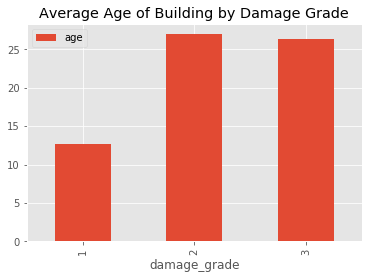

In [10]:
df[['age', 'damage_grade']].groupby(['damage_grade']).mean().plot(kind='bar', title='Average Age of Building by Damage Grade')

Mean age of all buildings: 25.393500

In [11]:
df[['age', 'damage_grade']].groupby(['damage_grade']).mean()

,age
damage_grade,
1,12.633262
2,26.965046
3,26.301810


### My own EDA

In [12]:
a = df[['count_floors_pre_eq','age','area','height','count_families','damage_grade']]

In [13]:
a.describe()

,count_floors_pre_eq,age,area,height,count_families,damage_grade
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.146700,25.393500,38.438100,4.653100,0.984600,2.248800
std,0.736365,64.482893,21.265883,1.792842,0.423297,0.611993
min,1.000000,0.000000,6.000000,1.000000,0.000000,1.000000
25%,2.000000,10.000000,26.000000,4.000000,1.000000,2.000000
50%,2.000000,15.000000,34.000000,5.000000,1.000000,2.000000
75%,3.000000,30.000000,44.000000,5.000000,1.000000,3.000000
max,9.000000,995.000000,425.000000,30.000000,7.000000,3.000000


In [14]:
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area', 'height',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_

In [15]:
len(df.columns)

40

In [16]:
df.dtypes

building_id                                 int64
geo_level_1_id                              int64
geo_level_2_id                              int64
geo_level_3_id                              int64
count_floors_pre_eq                         int64
age                                         int64
area                                        int64
height                                      int64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64


In [17]:
pd.unique(df['geo_level_1_id'])

array([ 8,  7, 14, 23,  2, 13, 12, 22, 21,  0,  3,  1, 26,  5, 10,  6,  9,
       16,  4, 17, 11, 18, 19, 27, 28, 24, 20, 15, 30, 25, 29], dtype=int64)

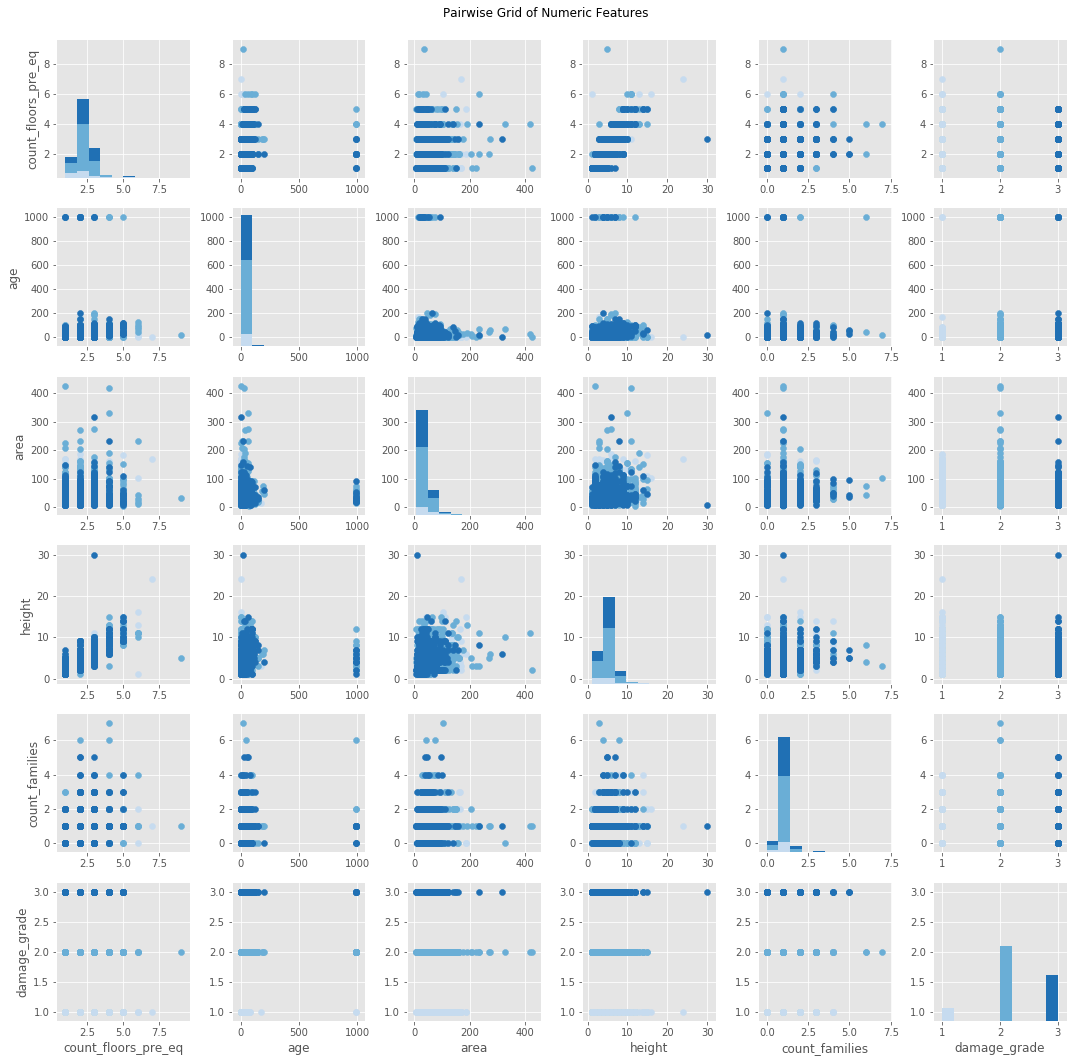

In [18]:
# Pair grid of key variables.
g = sns.PairGrid(df, vars=["count_floors_pre_eq", "age", "area", "height", "count_families", "damage_grade"], palette='Blues', hue='damage_grade')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Pairwise Grid of Numeric Features');

Text(0.5,1,'Correlation Heatmap of Numeric Features')

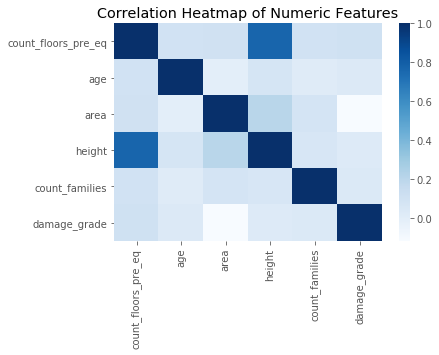

In [19]:
corr = a.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap='Blues')
plt.title('Correlation Heatmap of Numeric Features')

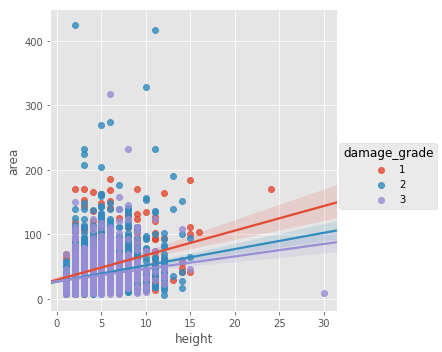

In [20]:
sns.lmplot(x="height", y="area", hue="damage_grade", data=df)

Text(0,0.5,'Average Count of Floors')

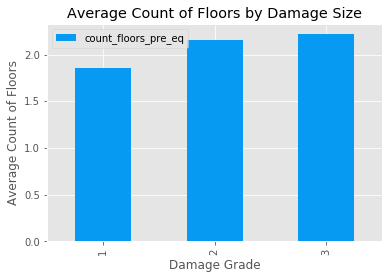

In [21]:
df[['count_floors_pre_eq', 'damage_grade']].groupby(['damage_grade']).mean().plot(kind='bar', title='Average Count of Floors by Damage Size', color='xkcd:azure')
plt.xlabel('Damage Grade')
plt.ylabel('Average Count of Floors')

Text(0,0.5,'Average Area (m2)')

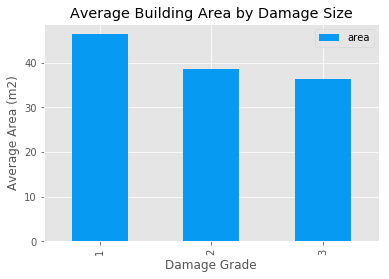

In [22]:
df[['area', 'damage_grade']].groupby(['damage_grade']).mean().plot(kind='bar', title='Average Building Area by Damage Size', color='xkcd:azure')
plt.xlabel('Damage Grade')
plt.ylabel('Average Area (m2)')

Text(0.5,0,'Damage Grade')

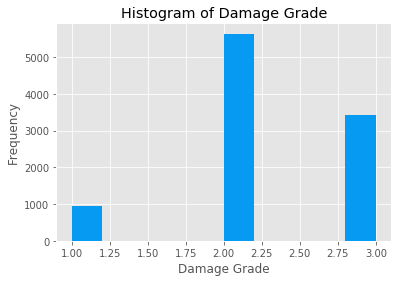

In [23]:
df['damage_grade'].plot(kind='hist', title='Histogram of Damage Grade', color='xkcd:azure', label='damage_grade')
plt.xlabel('Damage Grade')

In [24]:
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area', 'height',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_

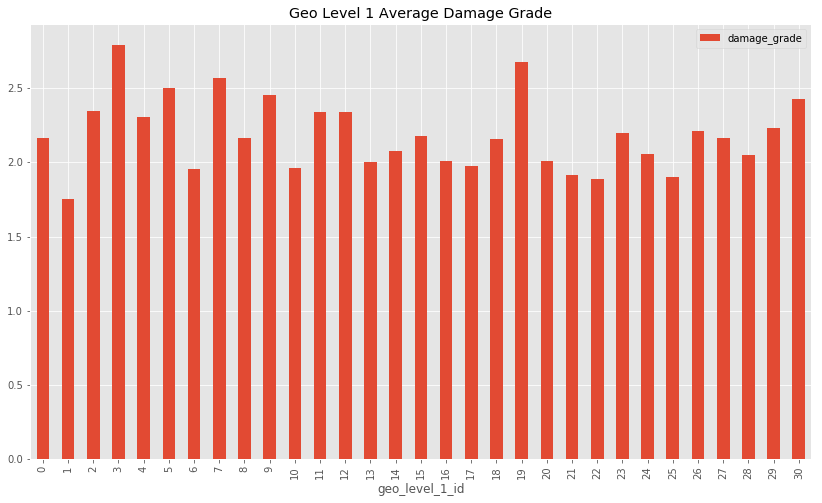

In [25]:
df[['geo_level_1_id', 'damage_grade']].groupby(['geo_level_1_id']).mean().plot(kind='bar', figsize=(14, 8), title='Geo Level 1 Average Damage Grade')

In [26]:
test.geo_level_3_id.nunique()

5175

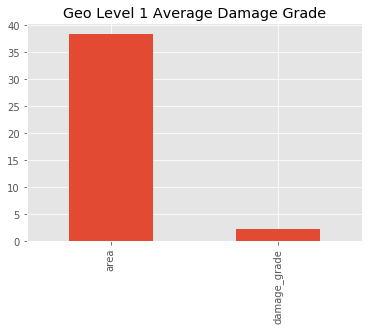

In [27]:
df[['area', 'damage_grade']].mean().plot(kind='bar', title='Geo Level 1 Average Damage Grade')

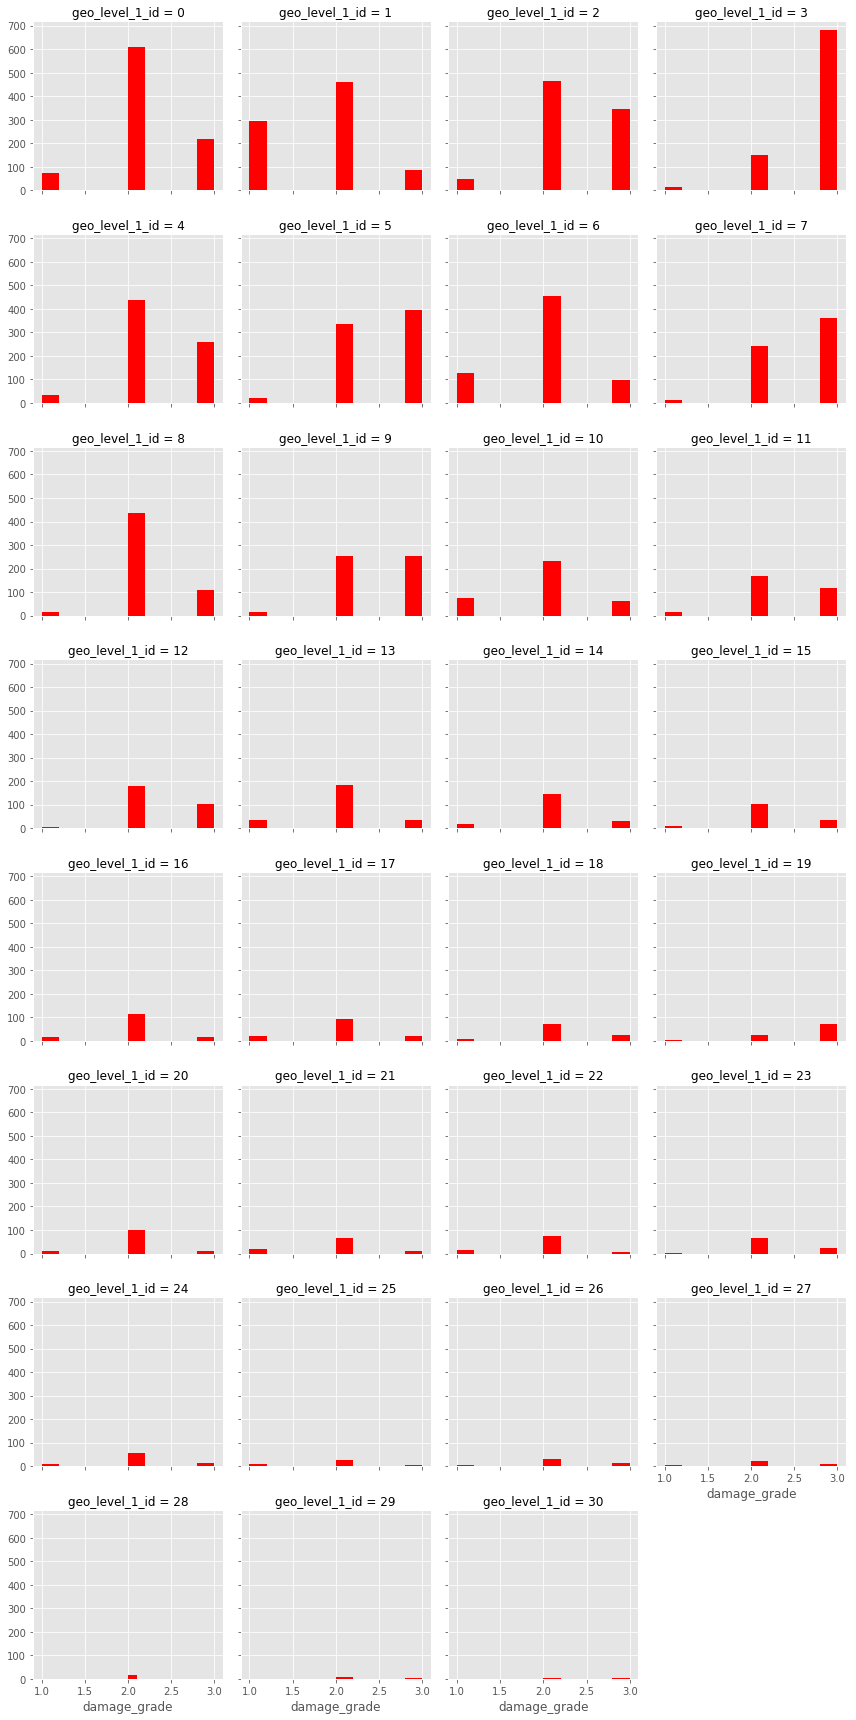

In [28]:
import seaborn as sns
g = sns.FacetGrid(df, col='geo_level_1_id', col_wrap=4)
g = g.map(plt.hist, "damage_grade", color="r")

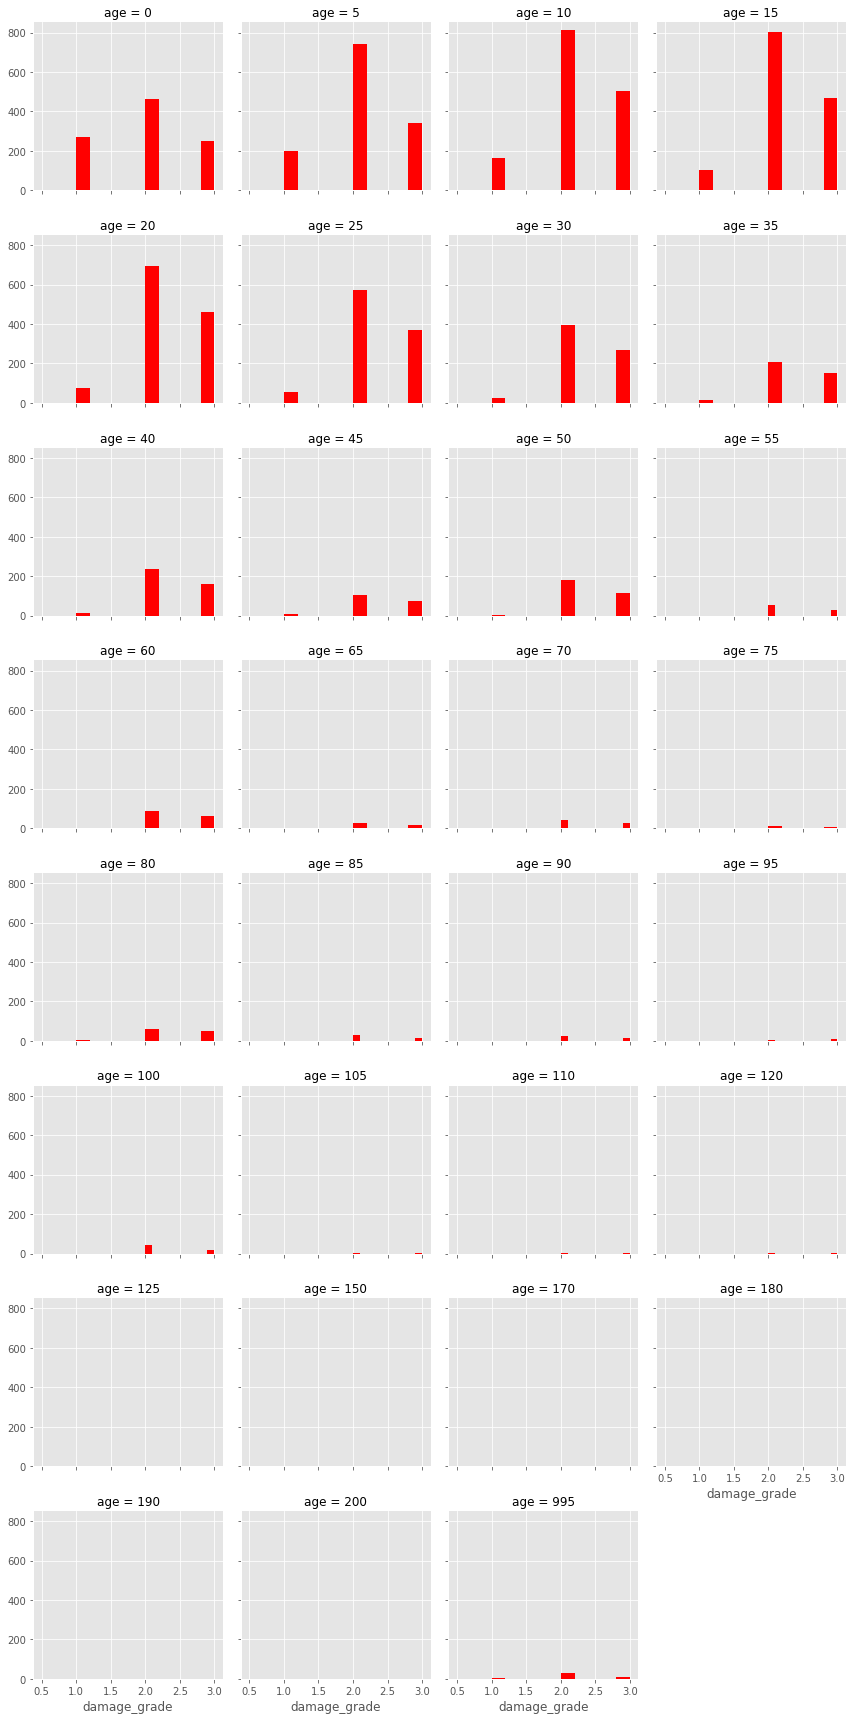

In [29]:
import seaborn as sns
g = sns.FacetGrid(df, col='age', col_wrap=4)
g = g.map(plt.hist, "damage_grade", color="r")

### Categorical Visualizations

In [30]:
df.dtypes

building_id                                 int64
geo_level_1_id                              int64
geo_level_2_id                              int64
geo_level_3_id                              int64
count_floors_pre_eq                         int64
age                                         int64
area                                        int64
height                                      int64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64


In [31]:
df['superstructure'] = df[['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone']].idxmax(axis=1)
df['superstructure_type'] = df[['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag','has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick','has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered','has_superstructure_rc_engineered','has_superstructure_other']].idxmax(axis=1)
#test['superstructure_type'] = test[['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag','has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick','has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered','has_superstructure_rc_engineered','has_superstructure_other']].idxmax(axis=1)

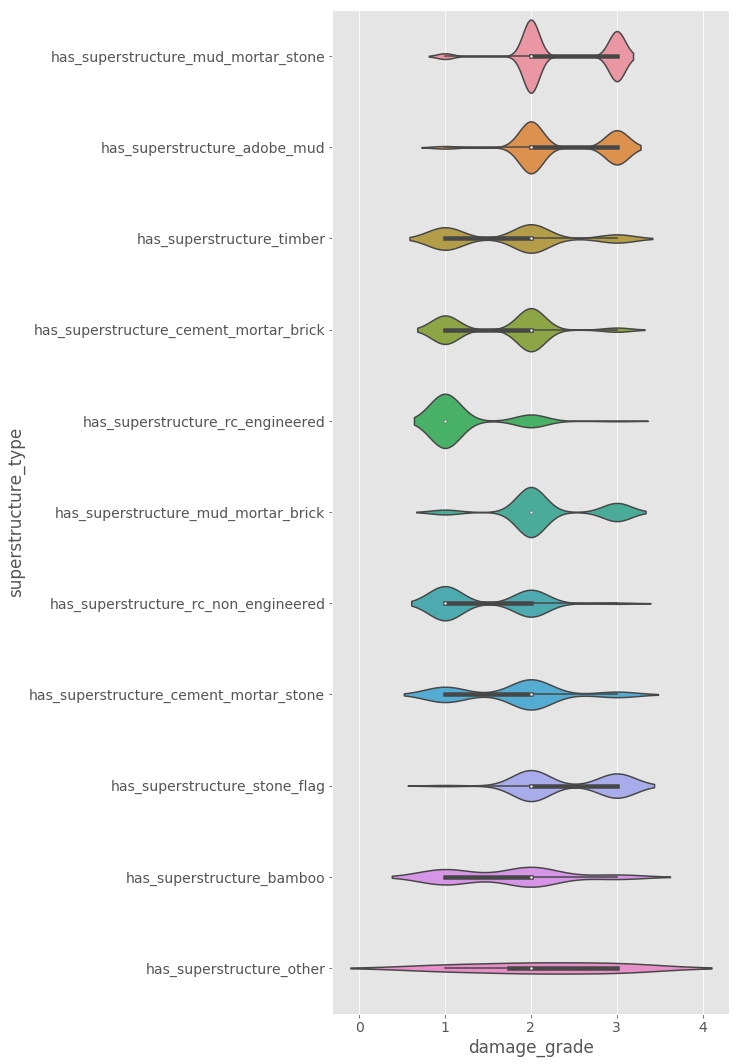

In [32]:
plt.rcParams.update({'font.size': 14})
sns.factorplot(x="damage_grade", y="superstructure_type", data=df, kind="violin", size=15, aspect=.7);

In [33]:
df['secondary_use_type'] = df[['has_secondary_use_agriculture','has_secondary_use_agriculture','has_secondary_use_hotel','has_secondary_use_rental','has_secondary_use_institution','has_secondary_use_school','has_secondary_use_industry','has_secondary_use_health_post','has_secondary_use_gov_office','has_secondary_use_use_police','has_secondary_use_other']].idxmax(axis=1)
#test['secondary_use_type'] = test[['has_secondary_use_agriculture','has_secondary_use_agriculture','has_secondary_use_hotel','has_secondary_use_rental','has_secondary_use_institution','has_secondary_use_school','has_secondary_use_industry','has_secondary_use_health_post','has_secondary_use_gov_office','has_secondary_use_use_police','has_secondary_use_other']].idxmax(axis=1)

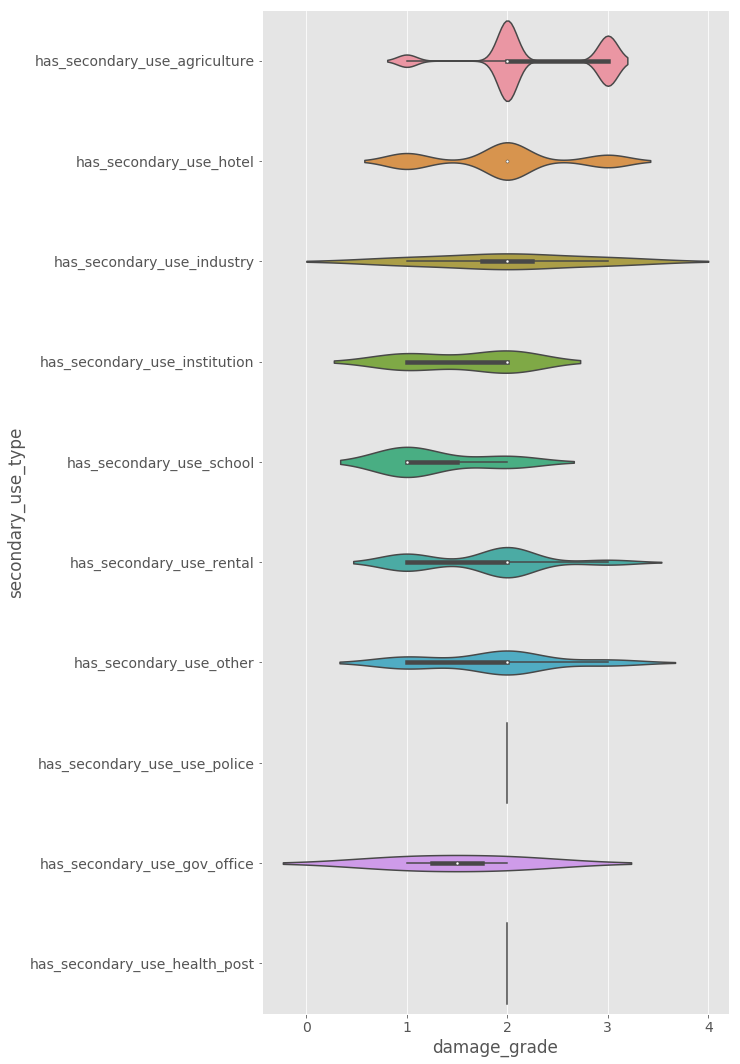

In [34]:
plt.rcParams.update({'font.size': 14})
sns.factorplot(x="damage_grade", y="secondary_use_type", data=df, kind="violin", size=15, aspect=.7);

In [35]:
df.dtypes

building_id                                 int64
geo_level_1_id                              int64
geo_level_2_id                              int64
geo_level_3_id                              int64
count_floors_pre_eq                         int64
age                                         int64
area                                        int64
height                                      int64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64


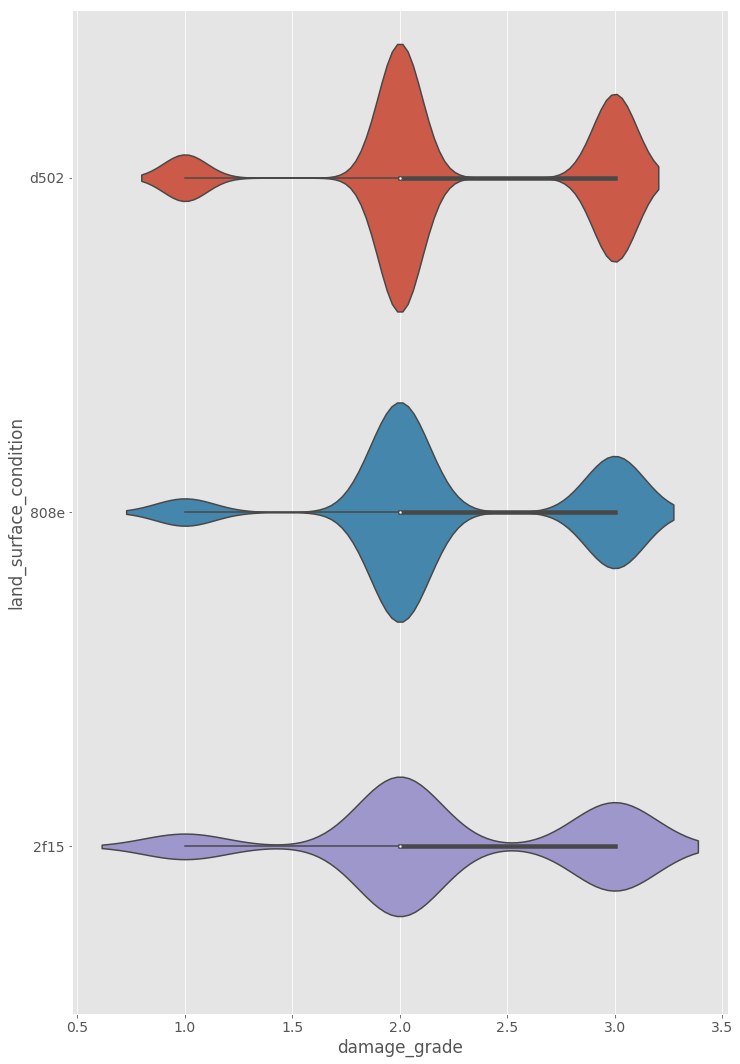

In [36]:
plt.rcParams.update({'font.size': 14})
sns.factorplot(x="damage_grade", y="land_surface_condition", data=df, kind="violin", size=15, aspect=.7);

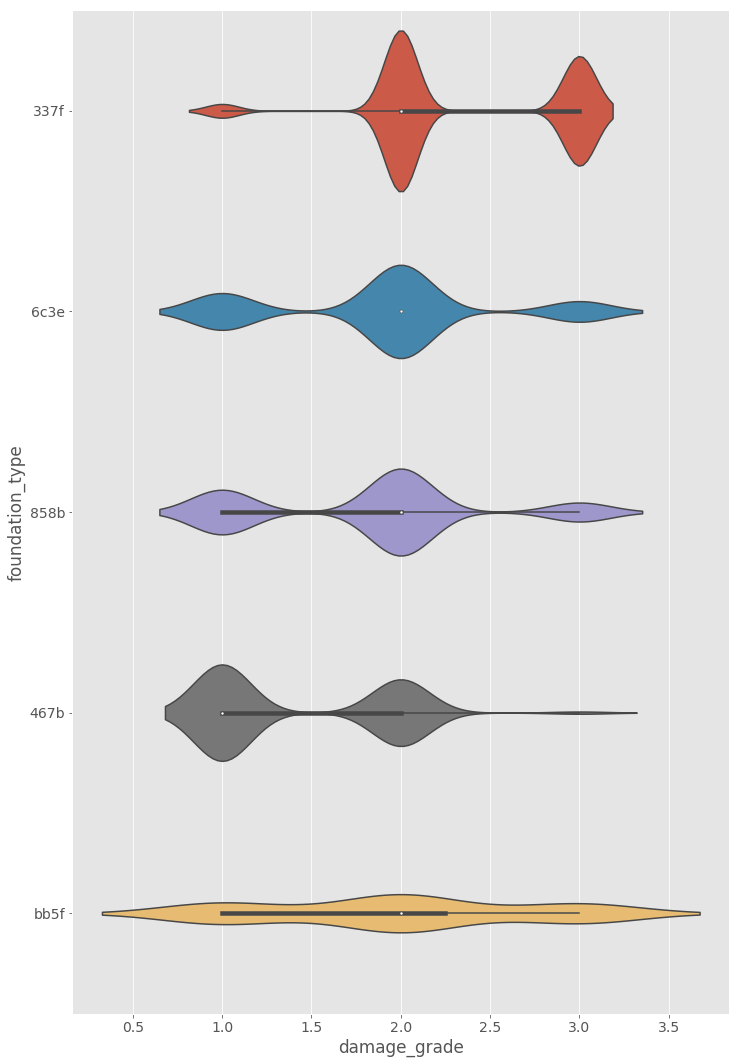

In [37]:
plt.rcParams.update({'font.size': 14})
sns.factorplot(x="damage_grade", y="foundation_type", data=df, kind="violin", size=15, aspect=.7);

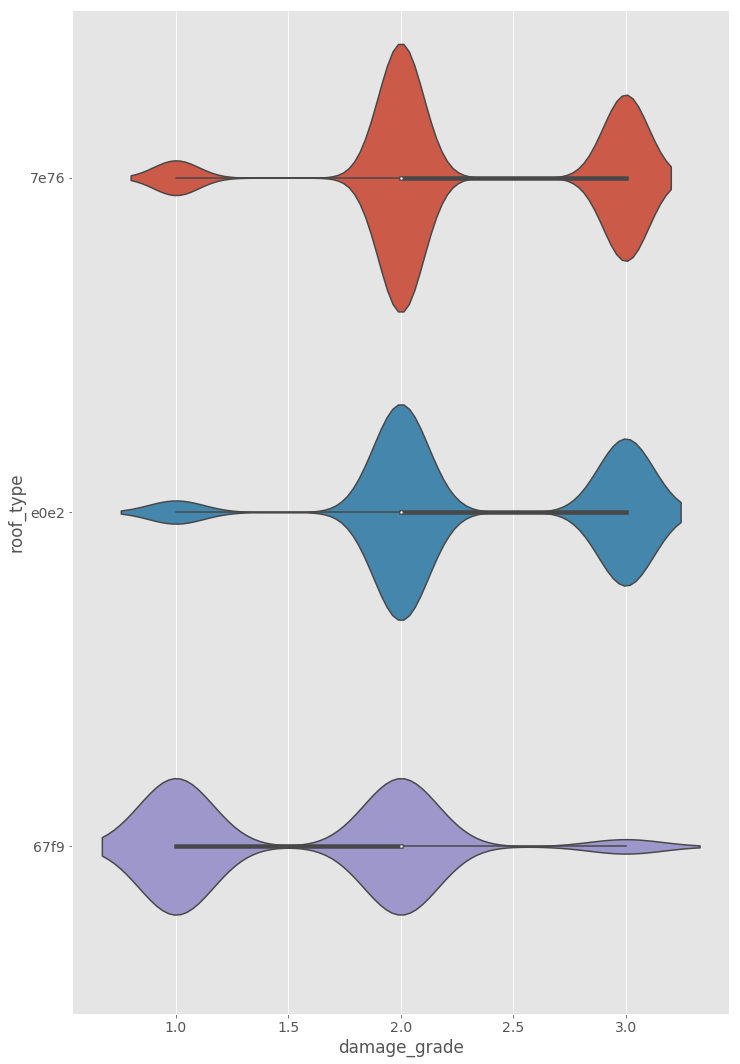

In [38]:
plt.rcParams.update({'font.size': 14})
sns.factorplot(x="damage_grade", y="roof_type", data=df, kind="violin", size=15, aspect=.7);

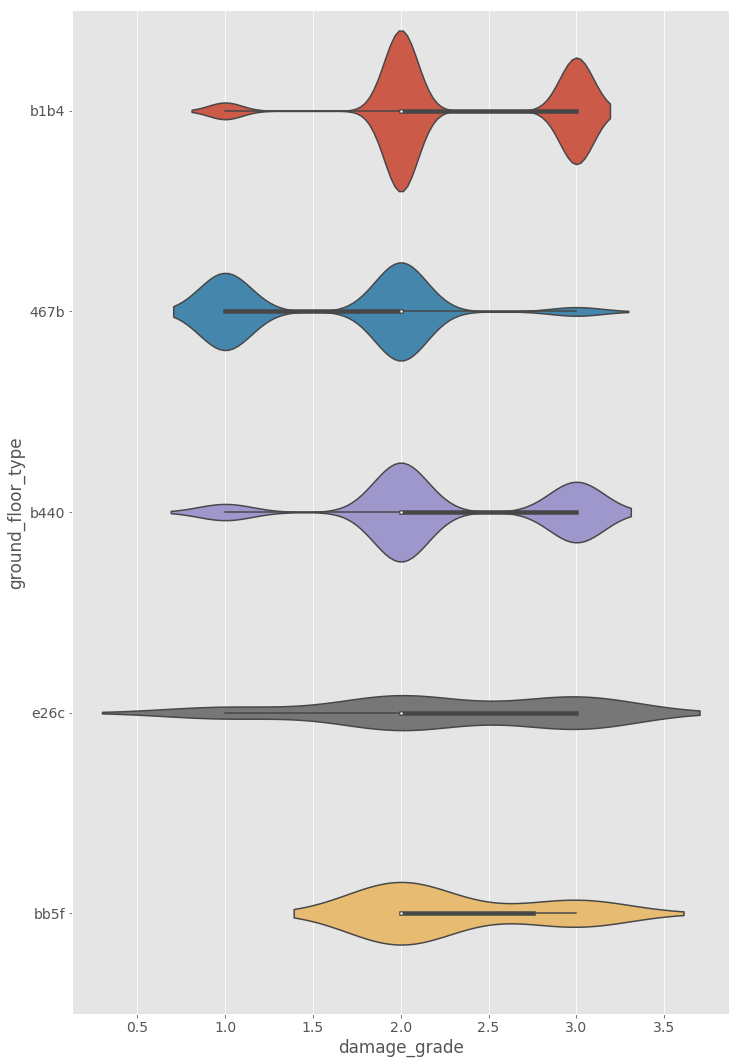

In [39]:
plt.rcParams.update({'font.size': 14})
sns.factorplot(x="damage_grade", y="ground_floor_type", data=df, kind="violin", size=15, aspect=.7);

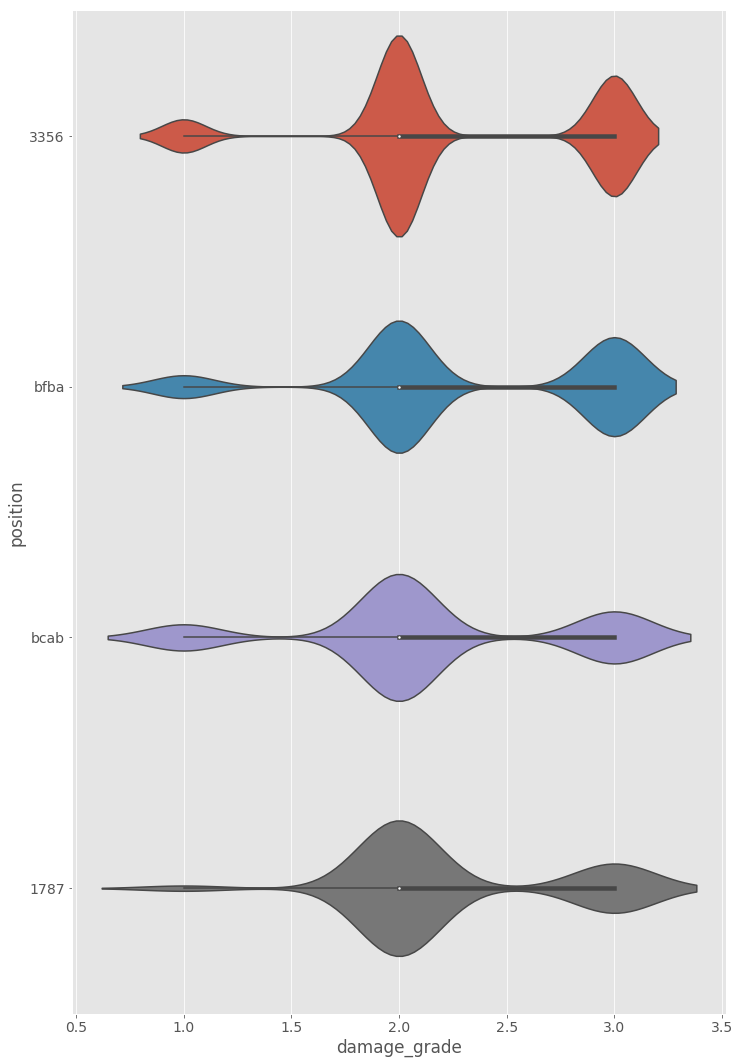

In [40]:
plt.rcParams.update({'font.size': 14})
sns.factorplot(x="damage_grade", y="position", data=df, kind="violin", size=15, aspect=.7);

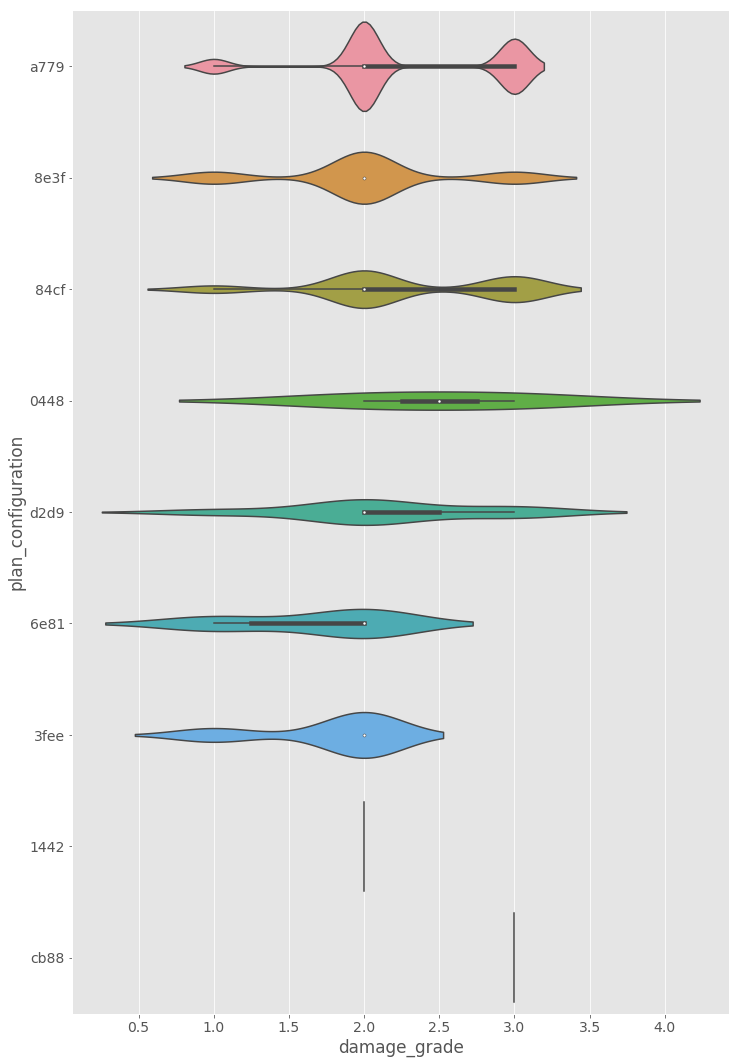

In [41]:
plt.rcParams.update({'font.size': 14})
sns.factorplot(x="damage_grade", y="plan_configuration", data=df, kind="violin", size=15, aspect=.7);

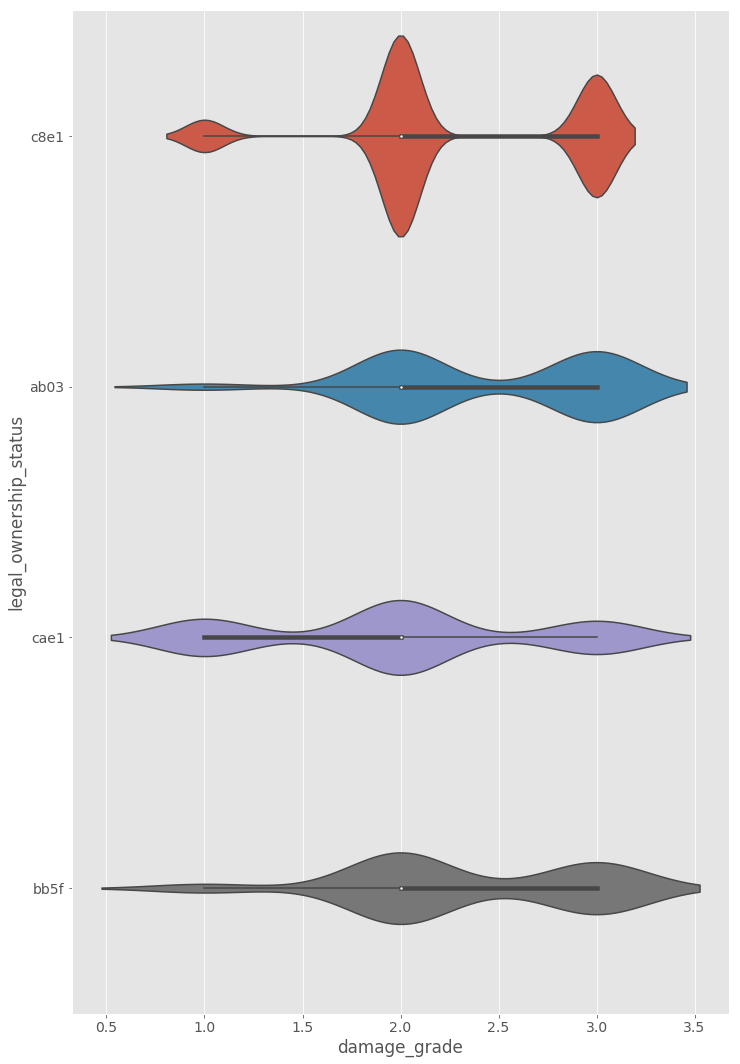

In [42]:
plt.rcParams.update({'font.size': 14})
sns.factorplot(x="damage_grade", y="legal_ownership_status", data=df, kind="violin", size=15, aspect=.7);

## Clean Data

In [43]:
# Are there null values in our dataset?
df.isnull().values.any()

False

As we don't have any null or missing data we can look at outliers. 

In [44]:
df.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area,height,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000
mean,9987.160000,7.135600,296.930300,2678.617900,2.146700,25.393500,38.438100,4.653100,0.089700,0.762600,...,0.029400,0.006400,0.00070,0.00070,0.000800,0.000200,0.000200,0.0001,0.005300,2.248800
std,5800.800829,6.225567,279.390651,2520.663769,0.736365,64.482893,21.265883,1.792842,0.285766,0.425511,...,0.168933,0.079748,0.02645,0.02645,0.028274,0.014141,0.014141,0.0100,0.072612,0.611993
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000
25%,4998.750000,2.000000,60.000000,606.750000,2.000000,10.000000,26.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,2.000000
50%,9963.500000,6.000000,219.000000,1937.500000,2.000000,15.000000,34.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,2.000000
75%,15044.750000,10.000000,466.000000,4158.000000,3.000000,30.000000,44.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,3.000000
max,19999.000000,30.000000,1411.000000,12151.000000,9.000000,995.000000,425.000000,30.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.0000,1.000000,3.000000


In [45]:
df[(df.age >= 100)].shape

(126, 43)

In [46]:
df[(df.age >= 200)].shape

(42, 43)

In [47]:
test[(test.age >= 100)].shape

(141, 39)

### Remove outliers

Tested the model by removing the top 95-99% of outlier data on age, area, height, count_families, and count_floors_pre_eq. A reduction in score resulted. 

In [48]:
#df = df[df.age <= 200]
#df = df[df.area <= 100]
#df = df[df.height <= 10]
#df = df[df.count_families <= 5]
#df = df[df.count_floors_pre_eq <= 5]

### Explore Numerical Features

(array([  9.87400000e+03,   8.40000000e+01,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          4.00000000e+01]),
 array([   0. ,   99.5,  199. ,  298.5,  398. ,  497.5,  597. ,  696.5,
         796. ,  895.5,  995. ]),
 <a list of 10 Patch objects>)

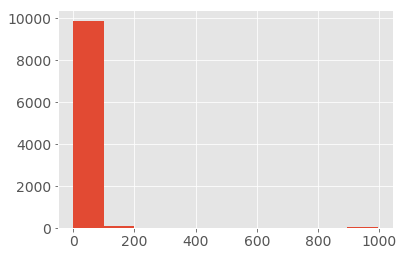

In [49]:
plt.hist(df.age)

(array([  2.44300000e+03,   6.47300000e+03,   9.21000000e+02,
          1.38000000e+02,   2.20000000e+01,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  1. ,   3.9,   6.8,   9.7,  12.6,  15.5,  18.4,  21.3,  24.2,
         27.1,  30. ]),
 <a list of 10 Patch objects>)

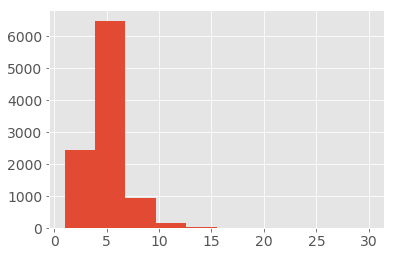

In [50]:
plt.hist(df.height)

(array([  7.90200000e+03,   1.83500000e+03,   2.06000000e+02,
          4.10000000e+01,   6.00000000e+00,   4.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([   6. ,   47.9,   89.8,  131.7,  173.6,  215.5,  257.4,  299.3,
         341.2,  383.1,  425. ]),
 <a list of 10 Patch objects>)

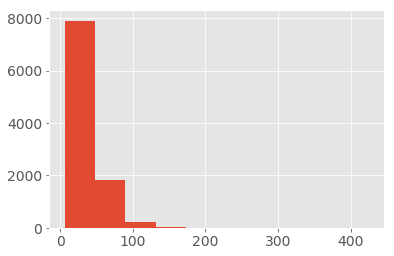

In [51]:
plt.hist(df.area)

(array([  1.52100000e+03,   5.92300000e+03,   2.23500000e+03,
          2.24000000e+02,   0.00000000e+00,   8.70000000e+01,
          8.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([ 1. ,  1.8,  2.6,  3.4,  4.2,  5. ,  5.8,  6.6,  7.4,  8.2,  9. ]),
 <a list of 10 Patch objects>)

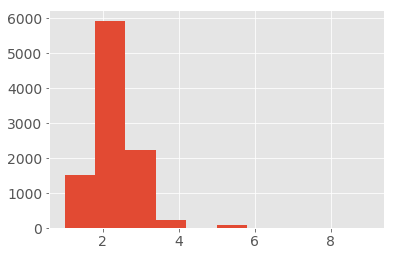

In [52]:
plt.hist(df.count_floors_pre_eq)

(array([  8.03000000e+02,   8.67200000e+03,   4.33000000e+02,
          0.00000000e+00,   7.00000000e+01,   1.60000000e+01,
          0.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          1.00000000e+00]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

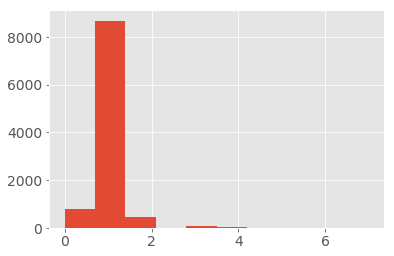

In [53]:
plt.hist(df.count_families)

(array([ 8914.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1086.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

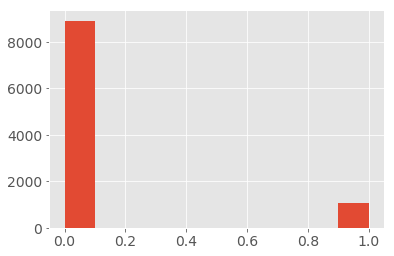

In [54]:
plt.hist(df.has_secondary_use)

#### Determinations
In all numeric features are very much skewed to one side. This gives us an opportunity to bin the numeric features and hopefully add more signal for the model.

### Exploring Categorical Features

In [55]:
df.dtypes

building_id                                 int64
geo_level_1_id                              int64
geo_level_2_id                              int64
geo_level_3_id                              int64
count_floors_pre_eq                         int64
age                                         int64
area                                        int64
height                                      int64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64


#### Land Surface Condition

(array([  347.,     0.,     0.,     0.,     0.,  1342.,     0.,     0.,
            0.,  8311.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

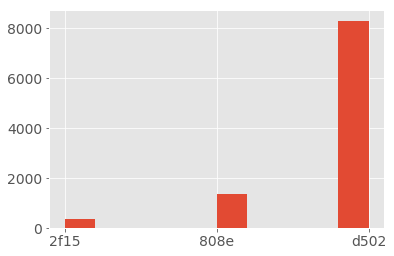

In [56]:
plt.hist(df.land_surface_condition)

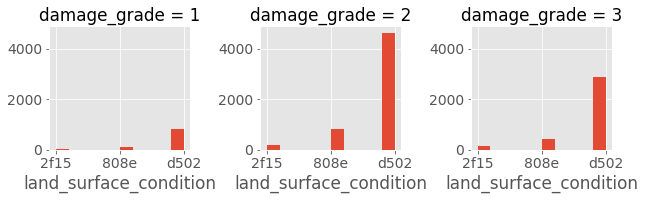

In [57]:
# Pair grid of key variables.
g = sns.FacetGrid(df, col='damage_grade')
g.map(plt.hist, 'land_surface_condition')

#### Foundation Type

(array([ 8489.,     0.,   372.,     0.,     0.,   504.,     0.,   587.,
            0.,    48.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

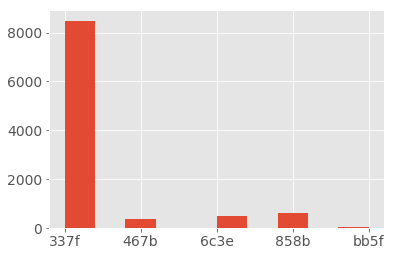

In [58]:
plt.hist(df.foundation_type)

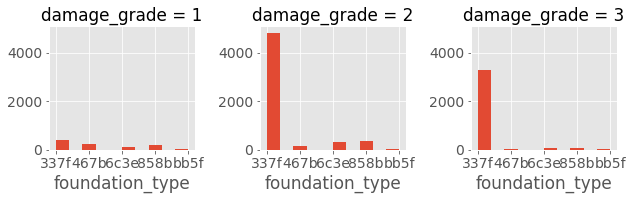

In [59]:
# Pair grid of key variables.
g = sns.FacetGrid(df, col='damage_grade')
g.map(plt.hist, 'foundation_type')

#### Roof Type

(array([  579.,     0.,     0.,     0.,     0.,  7007.,     0.,     0.,
            0.,  2414.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

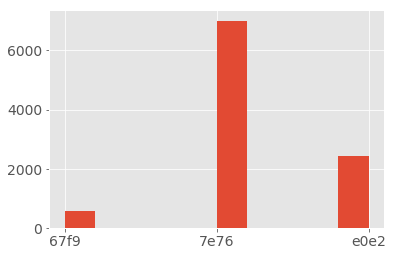

In [60]:
plt.hist(df.roof_type)

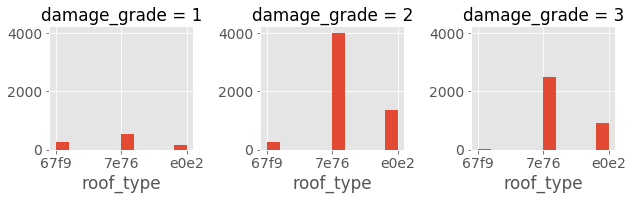

In [61]:
# Pair grid of key variables.
g = sns.FacetGrid(df, col='damage_grade')
g.map(plt.hist, 'roof_type')

#### Ground Floor Type

(array([  875.,     0.,  8118.,     0.,     0.,   963.,     0.,    10.,
            0.,    34.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

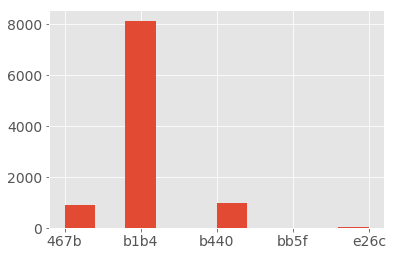

In [62]:
plt.hist(df.ground_floor_type)

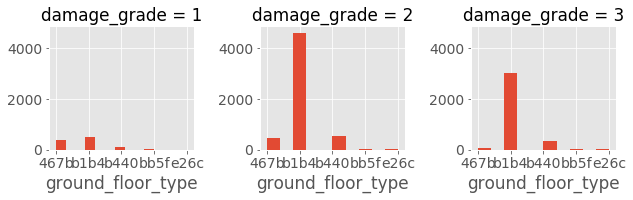

In [63]:
# Pair grid of key variables.
g = sns.FacetGrid(df, col='damage_grade')
g.map(plt.hist, 'ground_floor_type')

#### Other Floor Type

(array([ 1496.,     0.,     0.,   415.,     0.,     0.,  1677.,     0.,
            0.,  6412.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

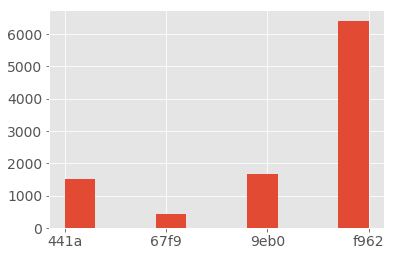

In [64]:
plt.hist(df.other_floor_type)

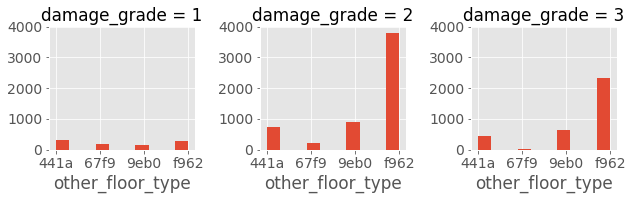

In [65]:
# Pair grid of key variables.
g = sns.FacetGrid(df, col='damage_grade')
g.map(plt.hist, 'other_floor_type')

#### Position

(array([  108.,     0.,     0.,  7792.,     0.,     0.,   477.,     0.,
            0.,  1623.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

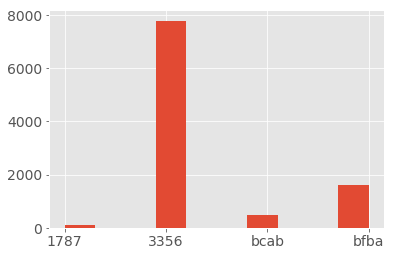

In [66]:
plt.hist(df.position)

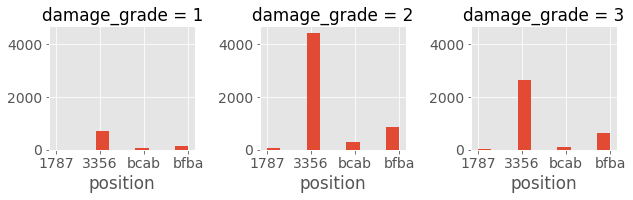

In [67]:
# Pair grid of key variables.
g = sns.FacetGrid(df, col='damage_grade')
g.map(plt.hist, 'position')

#### Plan Configuration

(array([  2.00000000e+00,   2.00000000e+00,   1.30000000e+01,
          6.00000000e+00,   0.00000000e+00,   2.00000000e+02,
          1.58000000e+02,   9.60300000e+03,   1.00000000e+00,
          1.50000000e+01]),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ]),
 <a list of 10 Patch objects>)

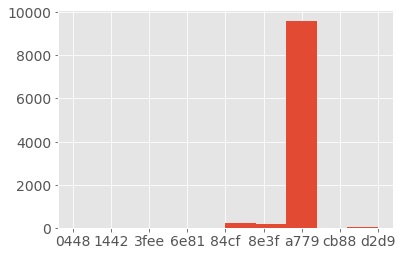

In [68]:
plt.hist(df.plan_configuration)

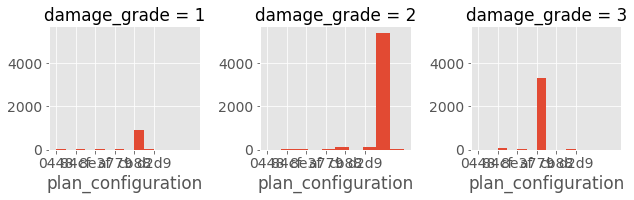

In [69]:
# Pair grid of key variables.
g = sns.FacetGrid(df, col='damage_grade')
g.map(plt.hist, 'plan_configuration')

#### Legal Ownership Status

(array([   98.,     0.,     0.,    61.,     0.,     0.,  9627.,     0.,
            0.,   214.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

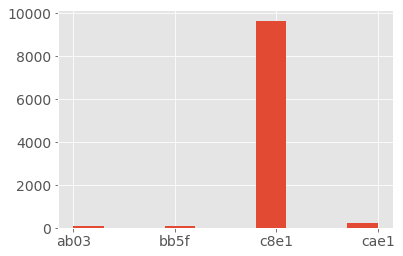

In [70]:
plt.hist(df.legal_ownership_status)

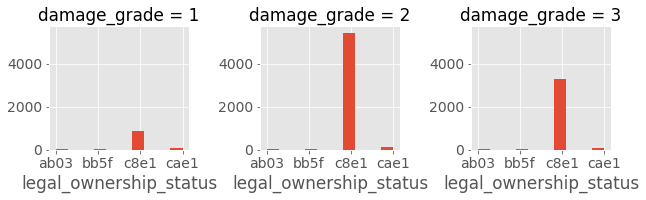

In [71]:
# Pair grid of key variables.
g = sns.FacetGrid(df, col='damage_grade')
g.map(plt.hist, 'legal_ownership_status')

#### Determinations

Many of the categorical variables have one category that by far the majority. One option to encode these features is one hot encoding, there a new binary feature will be made for each category in each feature. This is an excellent way of dealing with categorical data. However the curse of dimensionality causes our number of features to increase from 39 to 68.

Let's try both one hot encoding and feature hashing as a way of encoding these categorical variables.

#### One Hot Encoding of Categorical Features

The following features are categorical. For sklearn we will need to convert these to numeric features.

land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
legal_ownership_status                     object

The best way to do this is through one-hot encoding. We will use Pandas get_dummies method to accomplish this. Scikitlearn has a One_hot_encoding method as part of their preprocessing set as well.

In [72]:
df = pd.get_dummies(df)
test = pd.get_dummies(test)

One hot encode area to see if it impacts score.

In [73]:
#area_dummies = pd.get_dummies(df.area)
#test_dummies = pd.get_dummies(test.area)
#df = df.join(area_dummies)
#test = test.join(test_dummies)

In [74]:
#geo1_dummies = pd.get_dummies(df.geo_level_1_id)
#geo1_dummies = pd.get_dummies(test.geo_level_1_id)

In [75]:
#df = df.drop('geo_level_1_id', axis=1)
#df = df.join(geo1_dummies)
#test = test.drop('geo_level_1_id', axis=1)
#test = test.join(geo1_dummies)

In [76]:
df.shape

(10000, 92)

In [77]:
test.shape

(10000, 68)

#### Remove geo 2 and 3

In [78]:
df = df.drop(['geo_level_3_id'], axis=1)
test = test.drop(['geo_level_3_id'], axis=1)

## Feature Engineering

### Impute feature density for numeric categorical features

In [79]:
# impute density for area feature
#vals = df.area.value_counts()
#dvals = vals.to_dict()
#df['area_density'] = df.area.apply(lambda x: dvals.get(x, vals.min()))

In [80]:
# impute density for age feature
#vals = df.age.value_counts()
#dvals = vals.to_dict()
#df['age_density'] = df.age.apply(lambda x: dvals.get(x, vals.min()))

In [81]:
# impute density for height feature
#vals = df.height.value_counts()
#dvals = vals.to_dict()
#df['height_density'] = df.height.apply(lambda x: dvals.get(x, vals.min()))

In [82]:
# impute density for count_families feature
#vals = df.count_families.value_counts()
#dvals = vals.to_dict()
#df['count_families_density'] = df.age.apply(lambda x: dvals.get(x, vals.min()))

In [83]:
#df = df.drop(['geo_level_1_id','geo_level_2_id','geo_level_3_id'], axis=1)

## Prepare Dataset for Models

Drop building ID from training set as it is not a predictor.

In [84]:
y = df['damage_grade']

In [85]:
X = df.drop(['building_id', 'damage_grade'], axis=1)

In [86]:
y.head()

0    2
1    3
2    2
3    2
4    3
Name: damage_grade, dtype: int64

### Split Data

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=54321)

In [88]:
X_train.shape, y_train.shape

((7000, 89), (7000,))

In [89]:
X_test.shape, y_test.shape

((3000, 89), (3000,))

## TPOT

In [144]:
from tpot import TPOTClassifier
pipeline_optimizer = TPOTClassifier()

In [145]:
pipeline_optimizer = TPOTClassifier(generations=10, population_size=50, cv=5, scoring='f1_micro', random_state=54321, verbosity=2, n_jobs=2, warm_start=True)
pipeline_optimizer.fit(X_train, y_train)
print(pipeline_optimizer.score(X_test, y_test))

Generation 1 - Current best internal CV score: 0.6742876876103362


Generation 2 - Current best internal CV score: 0.6742876876103362


Generation 3 - Current best internal CV score: 0.6742876876103362


Generation 4 - Current best internal CV score: 0.6742876876103362


Generation 5 - Current best internal CV score: 0.6744306468669482


Generation 6 - Current best internal CV score: 0.6744306468669482


Generation 7 - Current best internal CV score: 0.6757161572166983


Generation 8 - Current best internal CV score: 0.6757161572166983


Generation 9 - Current best internal CV score: 0.6757161572166983


Generation 10 - Current best internal CV score: 0.6757161572166983



Best pipeline: GradientBoostingClassifier(SelectFwe(input_matrix, alpha=0.012), learning_rate=0.01, max_depth=10, max_features=0.95, min_samples_leaf=3, min_samples_split=18, n_estimators=100, subsample=0.95)
0.680333333333


In [146]:
pipeline_optimizer.export('tpot_exported_pipeline.py')

True

## Implement Algorithms

### Multiclass neural network

In [90]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score


# Create MLPClassifier object
mlp = MLPClassifier(activation='logistic', random_state=54321)

In [91]:
# Train the model using the training sets
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=54321,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [92]:
# Make predictions using the testing set
mnn_pred = mlp.predict(X_test)

In [93]:
# Score the model
multiclass_neural_network_score = f1_score(y_test, mnn_pred, average='micro')
multiclass_neural_network_score

0.61699999999999999

In [94]:
# Calculate confusion matrix
confusion_mnn = confusion_matrix(y_test,mnn_pred)

In [95]:
confusion_mnn

array([[ 116,  155,    1],
       [  77, 1497,  147],
       [  12,  757,  238]], dtype=int64)

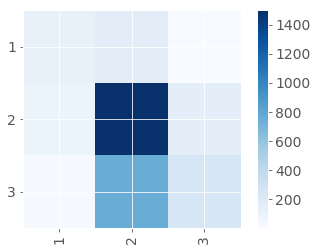

In [96]:
columns = ['1','2','3']

plt.imshow(confusion_mnn, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2], columns, rotation='vertical')
plt.yticks([0,1,2], columns)
plt.colorbar()

plt.show()

### Random forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest Regressor object
rf = RandomForestClassifier()

In [98]:
# Train the model using the training sets
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [99]:
# Make predictions using the testing set
rf_pred = rf.predict(X_test)

In [100]:
# Score the model
rf_score = f1_score(y_test, rf_pred, average='micro')
rf_score

0.6273333333333333

In [101]:
# Calculate confusion matrix
confusion_rf = confusion_matrix(y_test, rf_pred)

In [102]:
confusion_rf

array([[ 104,  153,   15],
       [  96, 1322,  303],
       [  18,  533,  456]], dtype=int64)

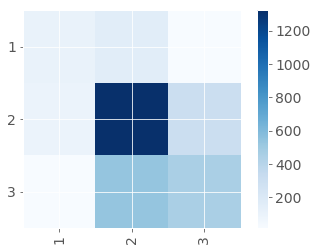

In [103]:
columns = ['1','2','3']

plt.imshow(confusion_rf, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2], columns, rotation='vertical')
plt.yticks([0,1,2], columns)
plt.colorbar()

plt.show()

### Decision Tree

In [104]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [105]:
# Create decision tree object with adaboost
tree = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=200)

In [106]:
# Train the model using the training sets
tree.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

In [107]:
# Make predictions using the testing set
tree_pred = tree.predict(X_test)

In [108]:
# Score the decision tree model
tree_score = f1_score(y_test, tree_pred, average='micro')
tree_score

0.65033333333333332

In [109]:
# Calculate confusion matrix
confusion_tree = confusion_matrix(y_test, tree_pred)

In [110]:
confusion_tree

array([[  93,  171,    8],
       [  55, 1361,  305],
       [   8,  502,  497]], dtype=int64)

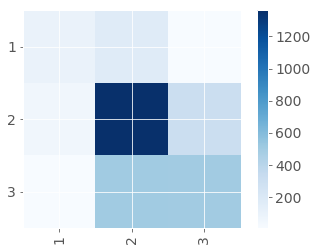

In [111]:
columns = ['1','2','3']

plt.imshow(confusion_tree, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2], columns, rotation='vertical')
plt.yticks([0,1,2], columns)
plt.colorbar()

plt.show()

In [112]:
print(tree.feature_importances_)

[             nan              nan   7.34635551e-03              nan
              nan              nan   9.35553070e-04   4.02986504e-03
   1.24555021e-03   1.16806543e-04   2.50984273e-03   9.60672184e-04
              nan   8.58848104e-03   9.35980376e-04   1.26319606e-04
   9.91403505e-04   7.21652273e-03   4.59544040e-03              nan
   1.54504733e-05   1.21864987e-05   4.84212166e-08   1.52940279e-06
   2.60949701e-14   4.83572424e-15   1.05038030e-22   2.29653342e-06
   4.25618954e-04   2.97321375e-03              nan   1.73809758e-01
   6.07254347e-03   1.94803861e-04   3.03361848e-03   4.12352073e-03
   9.00123929e-04   1.46692204e-03              nan              nan
   1.29502958e-03   1.54762377e-03   1.28227234e-03   3.84133828e-08
   8.63424966e-04   1.09071412e-02   3.13618960e-03   6.61498438e-03
   2.78834176e-02   7.47075393e-05   2.45124657e-03   1.64552218e-04
   6.04928722e-03   2.63701170e-08   1.70804768e-06   3.93745638e-07
   2.38327074e-14   7.84431349e-04

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\tree.py:508: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


### XGBoost

In [113]:
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

In [114]:
#Fitting XGB classifier 
xboost = XGBClassifier(n_estimators=200,min_child_weight=3,colsample_bylevel=.7,colsample_bytree=.7,gamma=2, random_state=54321, n_jobs=2)

In [115]:
xboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
       colsample_bytree=0.7, gamma=2, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=3, missing=None, n_estimators=200,
       n_jobs=2, nthread=None, objective='multi:softprob',
       random_state=54321, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [116]:
xboost_pred = xboost.predict(X_test)

In [117]:
xboost_pred

array([2, 3, 2, ..., 2, 2, 3], dtype=int64)

In [118]:
# Score the decision tree model
xgboost_score = f1_score(y_test, xboost_pred, average='micro')
xgboost_score

0.66933333333333334

Try bagging classifier

In [119]:
bag = BaggingClassifier(base_estimator=xboost)

In [120]:
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
       colsample_bytree=0.7, gamma=2, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=3, missing=None, n_estimators=200,
       n_jobs=2, nthread=None, objective='multi:softprob',
       random_state=54321, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [121]:
bag_pred = bag.predict(X_test)
# Score the decision tree model
bag_score = f1_score(y_test, bag_pred, average='micro')
bag_score

0.66866666666666663

Try voting classifier.

In [122]:
eclf = VotingClassifier([('neural', mlp), ('bag', bag)], voting='soft', weights=[1,2])

In [123]:
eclf.fit(X_train, y_train)

VotingClassifier(estimators=[('neural', MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs...estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=[1, 2])

In [124]:
eclf_pred = eclf.predict(X_test)
# Score the decision tree model
eclf_score = f1_score(y_test, eclf_pred, average='micro')
eclf_score

0.66800000000000004

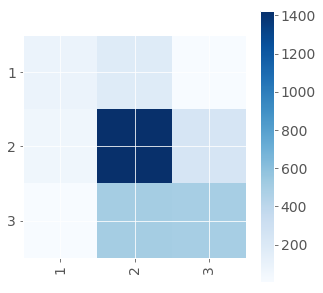

In [125]:
# Calculate confusion matrix
confusion_xboost = confusion_matrix(y_test, xboost_pred)
columns = ['1','2','3']
plt.rcParams["figure.figsize"] = (5,5)

plt.imshow(confusion_xboost, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2], columns, rotation='vertical')
plt.yticks([0,1,2], columns)
plt.colorbar()

plt.show()

In [126]:
confusion_xboost

array([[  90,  179,    3],
       [  58, 1425,  238],
       [   7,  507,  493]], dtype=int64)

In [127]:
print(xboost.feature_importances_)

[ 0.24554367  0.20409982  0.02139037  0.06996435  0.0583779   0.01648841
  0.00490196  0.01827095  0.01470588  0.00311943  0.00222816  0.02272727
  0.01737968  0.01024955  0.00757576  0.00178253  0.00668449  0.01871658
  0.00980392  0.00311943  0.00089127  0.00044563  0.          0.          0.
  0.          0.          0.          0.0026738   0.00490196  0.00980392
  0.00222816  0.02049911  0.02183601  0.0040107   0.00490196  0.0013369
  0.00846702  0.00668449  0.01247772  0.01693405  0.00178253  0.0026738   0.
  0.          0.00445633  0.0040107   0.00579323  0.02005348  0.0013369
  0.00534759  0.00713012  0.00178253  0.          0.          0.00044563
  0.          0.          0.0013369   0.00891266  0.          0.          0.0013369
  0.0013369   0.00623886  0.00222816  0.00802139  0.00356506  0.0026738
  0.00490196  0.00757576  0.          0.00490196  0.00178253  0.
  0.00445633  0.00089127  0.00178253  0.00668449  0.00089127  0.          0.
  0.          0.          0.          0

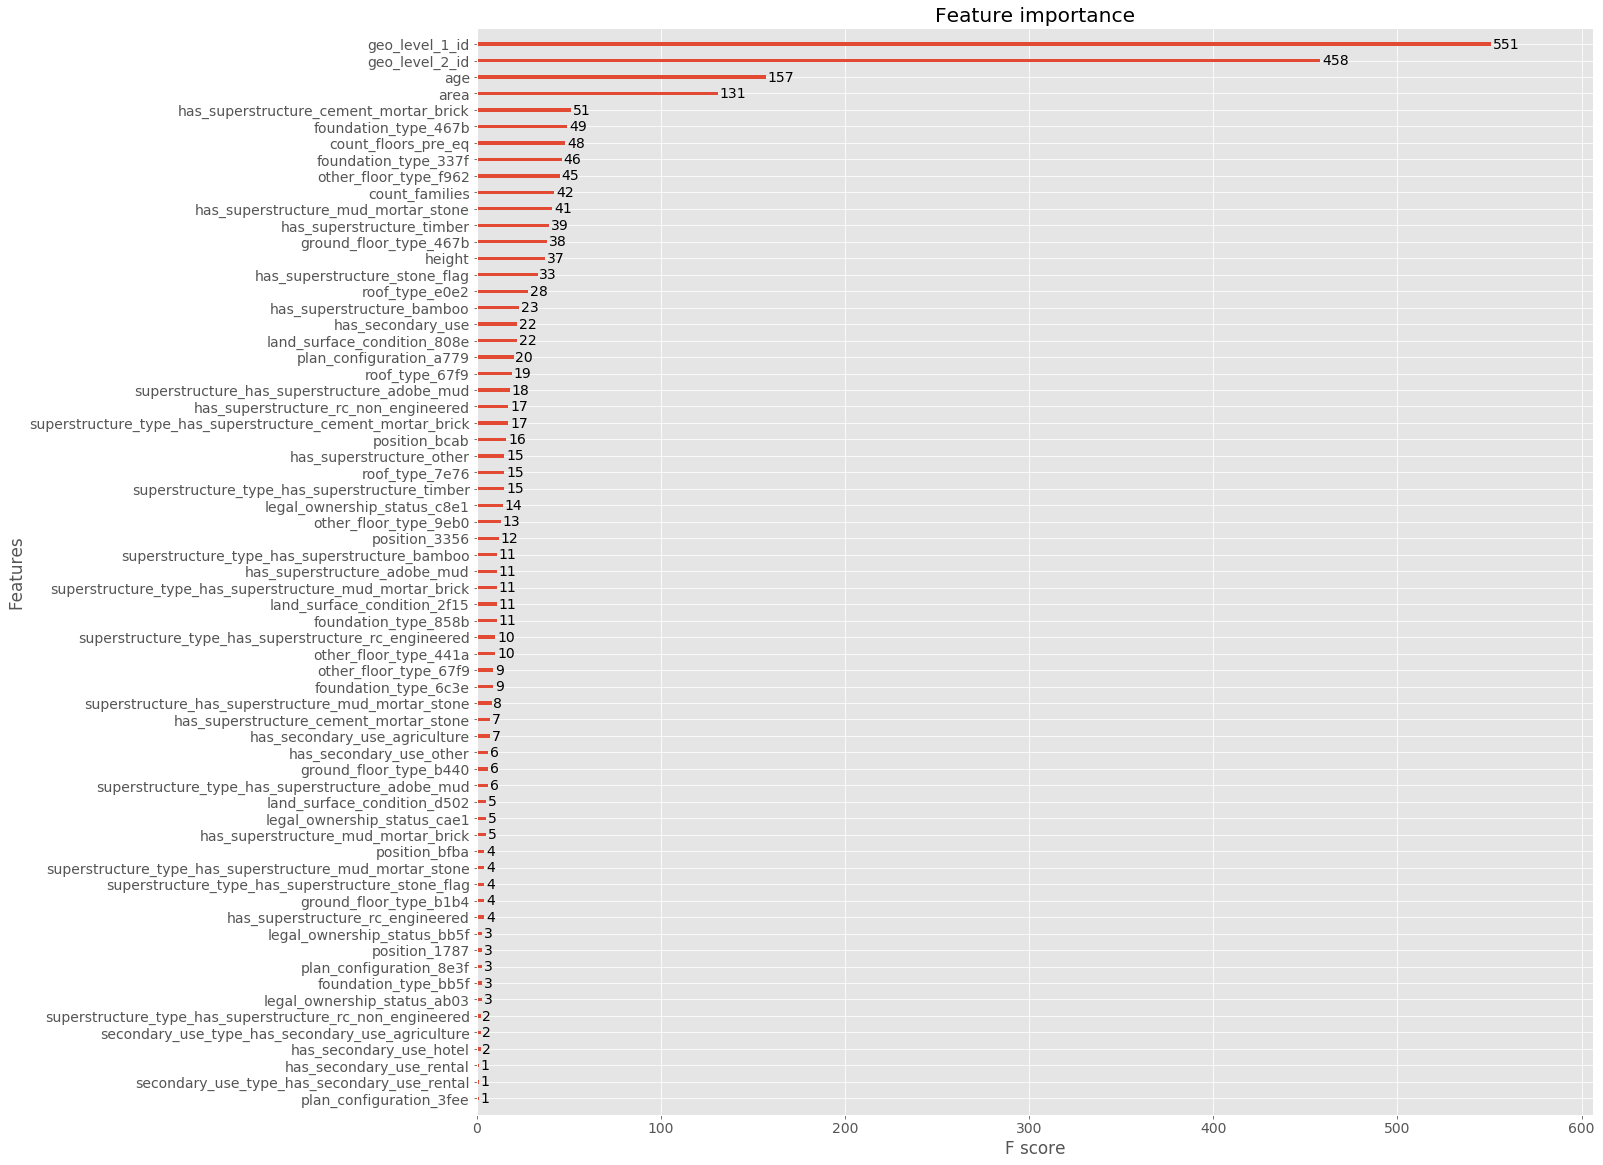

In [128]:
# plot feature importance
from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (20,20)
plot_importance(xboost)
plt.show()

## Score Models

In [129]:
print("Classification models:")
print("Multiclass neural network score: ", multiclass_neural_network_score)
print("Random forest score: ", rf_score)
print("Decision tree score: ", tree_score)
print("XGBoost score ", xgboost_score)

Classification models:
Multiclass neural network score:  0.617
Random forest score:  0.627333333333
Decision tree score:  0.650333333333
XGBoost score  0.669333333333


## Evaluate Misclassified Records

Create dataframe using best model predictions and training features.

In [130]:
#df['damage_grade_pred'] = xboost.predict(X)

In [131]:
#problem = df[(df.damage_grade == 3) & (df.damage_grade_pred ==2)]

In [132]:
#problem.to_csv('problem.csv', index=False)

## Make Prediction and Output for Scoring

Before we predict and export our score we need to apply the same changes to our test set as our training set. 

In [133]:
test = test.drop('building_id', axis=1)

In [134]:
test.head()

,geo_level_1_id,geo_level_2_id,count_floors_pre_eq,age,area,height,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,...,plan_configuration_6e81,plan_configuration_84cf,plan_configuration_8e3f,plan_configuration_a779,plan_configuration_cb88,plan_configuration_d2d9,legal_ownership_status_ab03,legal_ownership_status_bb5f,legal_ownership_status_c8e1,legal_ownership_status_cae1
0,1,42,2,0,24,4,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,4,227,2,15,20,3,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,10,361,2,10,29,3,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,275,2,10,37,6,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,5,370,3,25,35,5,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [135]:
# Predict using test set
test_pred = bag.predict(test)

ValueError: Number of features of the model must match the input. Model n_features is 89 and input n_features is 66.

In [ ]:
test_pred

In [ ]:
# Merge test set with test predictions. Only keep building_id and the damage_grade prediction
submission = pd.DataFrame(data=test_pred, columns=['damage_grade'])
submission['building_id'] = test1['building_id']

In [ ]:
submission.head()

In [ ]:
header = ['building_id','damage_grade']
submission.to_csv('submission.csv', columns=header, index=False)